## Codio Activity 6.1: Applying Singular Value Decomposition (SVD)

This assignment targets the use of singular value decomposition (SVD). As demonstrated in the video lectures, you will use `scipy.linalg` to perform the SVD. However, rather than the Boston dataset, you will use image data to explore the information contained in the singular values of $\Sigma$. The data come from another built-in dataset in sklearn called the `olivetti_faces`. Each image in the dataset is a 64 pixel by 64 pixel photo of a person’s face.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import svd
from sklearn.datasets import fetch_olivetti_faces

### Loading the Dataset

The data can be accessed by calling the `fetch_olivetti_faces` function.  It is delivered in multiple pieces as a collection of flattened images, so after loading we select the tenth image and reshape it to `64 x 64`. 

In [2]:
#accessing the data
data = fetch_olivetti_faces(data_home='data')
X = data.data

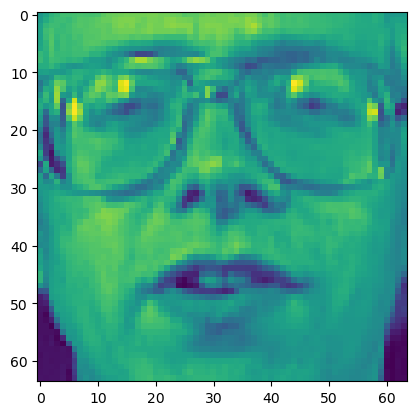

In [3]:
#what the reshaped image looks like
plt.imshow(X[10].reshape(64, 64))

In [4]:
#assign to image variable
image = X[10].reshape(64, 64)

## Problem 1

### Scaling the Image

Use the same strategy as the video to scale the `image` by subtracting the mean and dividing by the standard deviation.  Use `numpy` methods to find the `mean` and `std`.  Assign your results to `ans1` below.  Note that the image should look identical after the scaling.

In [5]:
#Normalize the data
ans1 = (image - image.mean())/image.std()
type(ans1)

numpy.ndarray

In [6]:
ans1

array([[-0.15727723,  0.18584998,  0.5913641 , ..., -0.12608357,
        -0.06369712, -0.03250346],
       [-0.06369712,  0.40420341,  0.7161374 , ...,  0.09226988,
         0.15465677,  0.12346309],
       [ 0.12346309,  0.6849442 ,  0.8721044 , ...,  0.06107665,
         0.31062332,  0.2794301 ],
       ...,
       [-3.2766142 , -3.2142277 , -3.2142277 , ..., -3.5573545 ,
        -3.3701944 , -3.432581  ],
       [-3.2454207 , -3.2142277 , -3.2454207 , ..., -3.5261612 ,
        -3.4013877 , -3.432581  ],
       [-3.2142277 , -3.2454207 , -3.2142277 , ..., -3.5261612 ,
        -3.4013877 , -3.4013877 ]], shape=(64, 64), dtype=float32)

## Problem 2

### SVD of Scaled Image

Below, use the `svd` `scipy` function to factor the scaled image.  Assign your factors to variables `U`, `sigma`, and `VT` respectively.  Remember to set the argument `full_matrices` equal to `False`. 

In [7]:
norm_image = (image - image.mean())/image.std()
U,sigma,VT = svd(norm_image, full_matrices = False)

## Problem 3

### Converting $\Sigma$

As noted, `scipy` returns a single dimension vector that is the main diagonal of $\Sigma$. 

Use the `np.diag` function with argument `sigma` to create a diagonal matrix with the singular values as the main diagonal.  Assign your answer to the variable `Sigma` below.

In [8]:
Sigma = np.diag(sigma)
Sigma

array([[3.6854446e+01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.0636713e+01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.4717436e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.6606100e-02,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.9660378e-03, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.1715699e-03]], shape=(64, 64), dtype=float32)

## Problem 4

### Reconstructing the Image

Using the decomposed elements `U` and `VT` and the updated `Sigma` array, multiply the factored elements together using the `@` operator to reconstruct the original image.  Assign your results to `ans4` below. Note that the reconstructed image should look like the original image.

In [9]:
ans4 = U @ Sigma @ VT
ans4

array([[-0.1572778 ,  0.18585128,  0.5913633 , ..., -0.12608275,
        -0.06369691, -0.03250362],
       [-0.06369687,  0.40420353,  0.716136  , ...,  0.09226981,
         0.15465729,  0.12346389],
       [ 0.12346327,  0.6849446 ,  0.8721029 , ...,  0.06107725,
         0.31062415,  0.27943107],
       ...,
       [-3.2766175 , -3.2142313 , -3.2142293 , ..., -3.5573568 ,
        -3.3701956 , -3.432584  ],
       [-3.245424  , -3.2142298 , -3.2454228 , ..., -3.526163  ,
        -3.4013898 , -3.4325833 ],
       [-3.2142296 , -3.2454247 , -3.214229  , ..., -3.526164  ,
        -3.4013903 , -3.4013898 ]], shape=(64, 64), dtype=float32)

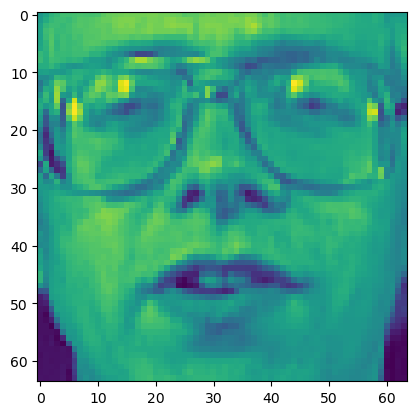

In [10]:
plt.imshow(ans4)

In [11]:
np.allclose(norm_image,ans4)

False

## Problem 5

### Examining Singular Values

Extract the first ten singular values (first two rows and columns) of `Sigma`.  Assign these to the variable `top_10` below.  

Standardize the singular values stored in `top_10`  by dividing each by the sum of the main diagonal (`Sigma.sum()`).  Assign the result to `ans5` below.  

In [12]:
top_10 = Sigma[:10,:10]
ans5 = top_10/Sigma.sum()

<Axes: >

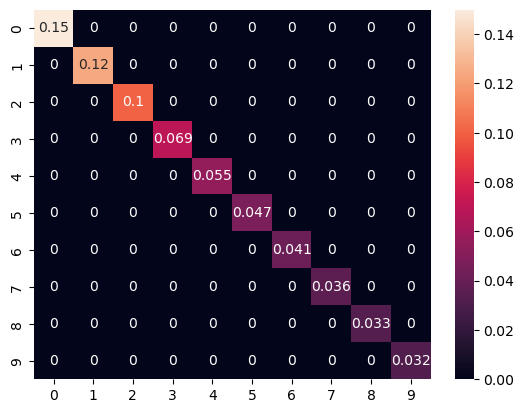

In [13]:
sns.heatmap(ans5,annot = True)

### Codio Activity 6.2: Analyzing the Results of PCA

This activity explores principal component analysis through two examples -- image data and tabular data. These examples are meant to demonstrate how PCA extracts important information from the data while reducing its dimensionality.

### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [14]:
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing

#### The Datasets

Both datasets are built in to the `sklearn` library.  The first is a familiar set of faces as 1-Dimensional Arrays, and the second is a dataset on housing prices in california neighborhoods.  The image data is limited to a single image and assigned to the variable `image` below.  The housing data is displayed as a DataFrame with the `.frame` attribute after setting `as_frame = True`. 

In [15]:
faces_data = pd.read_csv('data/face.csv')
cali_housing = fetch_california_housing(return_X_y=False, as_frame=True, data_home='data')

In [16]:
faces_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.673554,0.590909,0.433884,0.351240,0.227273,0.219008,0.210744,0.223140,0.223140,0.223140
1,1,0.479339,0.512397,0.582645,0.628099,0.665289,0.690083,0.694215,0.706612,0.719008,...,0.681818,0.623967,0.454545,0.371901,0.214876,0.223140,0.206612,0.202479,0.202479,0.202479
2,2,0.491736,0.541322,0.595041,0.648760,0.673554,0.685950,0.685950,0.706612,0.714876,...,0.685950,0.623967,0.471074,0.413223,0.227273,0.210744,0.210744,0.214876,0.214876,0.214876
3,3,0.491736,0.557851,0.607438,0.665289,0.669422,0.690083,0.685950,0.673554,0.719008,...,0.702479,0.632231,0.495868,0.417355,0.293388,0.206612,0.210744,0.214876,0.219008,0.219008
4,4,0.495868,0.561983,0.632231,0.669422,0.644628,0.685950,0.685950,0.681818,0.706612,...,0.702479,0.652893,0.504132,0.400826,0.289256,0.206612,0.210744,0.210744,0.210744,0.210744


In [17]:
faces_data.set_index('Unnamed: 0',inplace = True)

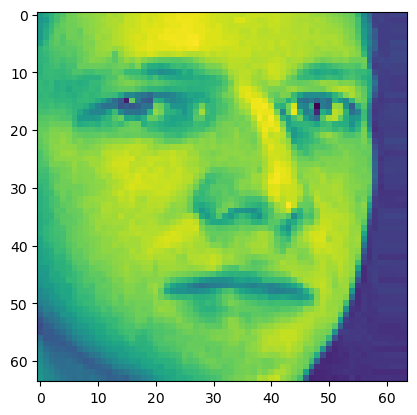

In [18]:
image = faces_data.values.reshape(64, 64)
plt.imshow(image)

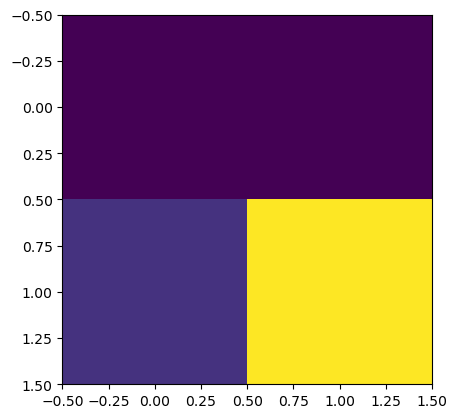

In [19]:
temp = np.array([[0.234, 0.234876778], [0.345, 0.995]])
plt.imshow(temp)

In [27]:
# cali_housing's type is Bunch of sklearn, which is dictionary subclass.
cali_housing.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [25]:
type(cali_housing)

sklearn.utils._bunch.Bunch

In [26]:
isinstance(cali_housing, dict)

True

In [31]:
# cali_housing.frame == cali_housing['frame']
cali_housing['frame']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [32]:
df_cali = cali_housing.frame.head(50)
df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Principal Component Analysis 

Recall the steps to perform Principal Component Analysis on an array.  

```
- standardize the data
- perform SVD
- select how many components to keep
```

From here, depending on the goal you will either eliminate all but the top `r` values in $\Sigma$ or evaluate the product of $U_r \dot \Sigma_r$.

## Problem 1

### Function to Standardize and Factor

Complete the function `svd_norm` according to the instructions below:

- The function should take, as input, an array `X`.
- The function should scale the array `X` using its mean and standard deviation and assign the result to ` x_norm`.
- The function should use the `svd` function to factor `x_norm` using `full_matrices` equal to `False` and assign the result to `U`, `sigma`, and `VT`.
- The function should use `np.diag()` to define a diagonal matrix with the singular values on main diagonal anfd assign the result to `Sigma`.
- The function should returns three arrays `U`, `Sigma` and `VT`.


def svd_norm(X):
    """This function takes in an array X, scales it according 
    to the transformation X - mu / sigma where mu is the mean
    and sigma the standard deviation of the dataset.

    Parameters
    ----------
    X: type `np.array`, shape (N, M)
        
    Returns
    -------
    A tuple (U, Sigma, VT) where
        U: type `np.ndarray`, shape (N, M)
            Numpy arrays with N rows, M columns 
        Sigma: type `np.ndarray`, shape (M, M)
            Numpy arrays with M rows and M columns
            A Diagonal matrix with the singular values on main diagonal
        VT: type `np.ndarray`, shape (M, M)
            Numpy array with M rows and M columns representing V Transpose
    """
    return None

In [33]:
def svd_norm(X):
    x_norm = (X-X.mean())/X.std()
    U,sigma,VT = svd(x_norm, full_matrices = False)
    Sigma = np.diag(sigma)
    return U,Sigma,VT
U,Sigma,VT = svd_norm(image)
print(U.shape,Sigma.shape,VT.shape)

(64, 64) (64, 64) (64, 64)


## Problem 2

### Reconstructing the Image

To complete this problem, follow the instructions below:

- Apply the `svd_norm` function you defined in Problem 1 to `image` and assign the result to `U`, `Sigma`, and `VT`.
- Use the `np.copy` function with argument `Sigma` to make a copy of the $\Sigma$ matrix and assign  the result to `Sigma_copy`.
- Set all but the first 5 singular values of `Sigma_copy` (first 25 values - 5x5 matrix) to zero.
-  Reconstruct the original image by multiplying $U \Sigma_{copy} VT$ with the `@` operator and assign the result to `simpler_image`. 

Note how much information from the image is captured in the first five singular values!

In [45]:
U,Sigma,VT = svd_norm(image)
Sigma_copy = np.copy(Sigma)
Sigma_copy[5:,5:] = 0


Text(0.5, 1.0, 'Image reconstructed from first 5 singular values')

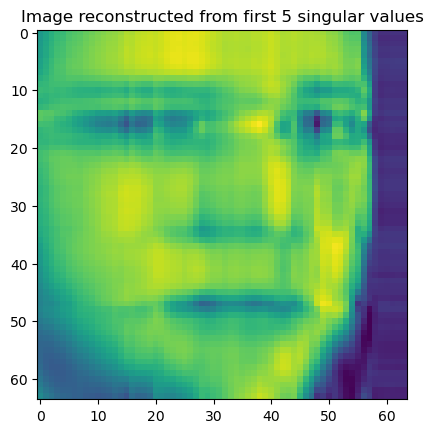

In [46]:
simpler_image = U@Sigma_copy@VT
plt.imshow(simpler_image)
plt.title('Image reconstructed from first 5 singular values')

## Problem 3

### Repeat for Tabular Data

As the example above demonstrates, using Principal Component Analysis is a way of extracting important information from the data through the SVD.  Now, you are to extract the matrix factorization from the SVD using the housing data `df`.  The earlier `svd_norm` function should work to factor a DataFrame.  Use your function to extract $U, \Sigma, VT$ from the DataFrame.  Assign your results to `U, Sigma, VT` below.

In [40]:
U,Sigma,VT = svd_norm(df_cali)
print(U.shape,Sigma.shape,VT.shape)

(50, 9) (9, 9) (9, 9)


## Problem 4

## Function to project into lower dimension `r`

Complete the function `pca` below according to the instructions below:

- The function takes two arguments, `X` and `r` where `X` is an array or DataFrame and `r` is dimension to project the data down into.
- The function should scale the array `X` using its mean and standard deviation and assign the result to ` x_norm`.
- The function should use the `svd` function to factor `x_norm` using `full_matrices` equal to `False` and assign the result to `U`, `sigma`, and `VT`.
- The function should use `np.diag()` to define a diagonal matrix with the singular values on main diagonal anfd assign the result to `Sigma`.
- The function should extract all the rows and the first `r` columns of `U` and assign the result to `Ur`.
- The function should extract the first `r` rows and columns of `Sigma` and assign the result to `Sigma_r`.
- The function should returns a DataFrame of shape `(N, r)` with columns labeled `pca_1`, `pca_2`, ..., `pca_r`. To achieve this use the code `pd.DataFrame(Ur @ Sigma_r, columns = [f'pca_{i}' for i in range(1, r + 1)])`


In [48]:
def pca(X,r):
    x_norm = (X - X.mean())/X.std()
    U,sigma,VT = svd(x_norm, full_matrices = False)
    Sigma = np.diag(sigma)
    Ur = U[:,:r]
    Sigma_r = Sigma[:r,:r]
    return pd.DataFrame(Ur@Sigma_r, columns = [f'pca_{i}' for i in range(1, r+1)])
XT = pca(df_cali,2)
print(XT.shape)
XT.head()

(50, 2)


,pca_1,pca_2
0,-6.733861,-1.878247
1,-6.997582,3.186467
2,-4.629262,-2.940347
3,-2.755903,-1.310675
4,-2.389522,-0.580863


## Problem 5

### Converting a New Datapoint

Suppose we have a new house given by the DataFrame below:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MedInc</th>      <th>HouseAge</th>      <th>AveRooms</th>      <th>AveBedrms</th>      <th>Population</th>      <th>AveOccup</th>      <th>Latitude</th>      <th>Longitude</th>      <th>MedHouseVal</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>3.87</td>      <td>28.64</td>      <td>5.43</td>      <td>1.1</td>      <td>1425.48</td>      <td>3.07</td>      <td>35.63</td>      <td>-119.57</td>      <td>2.07</td>    </tr>  </tbody></table>

Use your `pca` function to project this new house into 2 dimensions.  First, scale your data according to the mean and standard deviation of `df`.  Assign the normalized data to `normed_newhome` below.  Assign the results of the pca transformation on the scaled house data as a DataFrame with columns `pca_1` and `pca_2` to `ans5` below.

Hint: Refer to dr. Gomes’s video (Video 6.3 and 6.4)

In [50]:
newhome = pd.DataFrame([[3.87, 28.64, 5.43, 1.1, 1425.48, 3.07, 35.63, -119.57, 2.07]], columns = df_cali.columns)
newhome

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.87,28.64,5.43,1.1,1425.48,3.07,35.63,-119.57,2.07


In [51]:
normed_newhome = (newhome - df_cali.mean())/df_cali.std()
normed_newhome

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.710264,-3.61066,0.658465,0.440151,1.50288,2.777652,-200.324049,215.010643,0.325954


In [54]:
U,Sigma,VT = svd_norm(df_cali)

In [55]:
ans5 = normed_newhome@VT.T[:,:2]
ans5.columns = ['pca_1', 'pca_2']
ans5

,pca_1,pca_2
0,-18.728782,88.013992


Both of these examples offer insight to how PCA can reduce the dimensionality of your data while keeping important information about underlying relationships in tact.  

### Codio Activity 6.3: Plotting and Interpreting Singular Values

This activity focuses on building a scree plot with Python.  A scree plot can be used to determine how many Principal Components to keep in a given dataset.  Using an `sklearn` built in housing dataset, you will plot the values of $\Sigma$ in decreasing order -- this is a scree plot.  For more on scree plots see [here](https://en.wikipedia.org/wiki/Scree_plot#:~:text=In%20multivariate%20statistics%2C%20a%20scree,principal%20component%20analysis%20(PCA).).

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from scipy.linalg import svd
from sklearn.datasets import make_regression

In [57]:
housing = fetch_california_housing(as_frame = True, data_home = 'data')
housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [58]:
df_housing = housing.frame.head(50).drop('MedHouseVal', axis = 1) #limits due to computation 
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [61]:
df_housing.shape

(50, 8)

## Problem 1

### Extracting $\Sigma$

Complete the function `singular_values` according to the instructions below:

- The function takes, as input, an aray `X`, and a booloean flag `scale`, describing whether you want to scale the array `X` or not.
- Using an `if` statement, check if `scale` is `True`. If it is, scale `X` using its mean and standard deviation.
- If `scale` is not `True`, use the `svd` function to factor `X` into  `u`, `sigma`, and `vt`.
- The function should return the numpy array of singular values of X, `sigma`.


def singular_values(X, scale = False):
    """Return the singular values resulting from 
    SVD decomposition.  

    Parameters
    ----------
    X: np.array or pd.DataFrame
        An array of data
    scale: boolean
        Boolean determines whether data needs to be scaled

    Returns an numpy array of singular values of X
    """

In [62]:
def singular_values(X, scale = False):
    if scale:
        X = (X - X.mean())/X.std()
    u,sigma,vt = svd(X)
    return sigma

In [80]:
sigma = singular_values(df_housing)
print(sigma.shape)
sigma

(8,)


array([6.60167785e+03, 4.02993766e+02, 3.56009932e+01, 1.19618311e+01,
       4.11982067e+00, 1.36597020e+00, 3.87851125e-01, 5.13333826e-02])

## Problem 2

### Plotting $\Sigma$

Using the function above, build a plot of the singular values. Use your plot to determine how many principal components you should keep from the dataframe `df`.  Assign your solution as an integer to `ans2` below.

<BarContainer object of 8 artists>

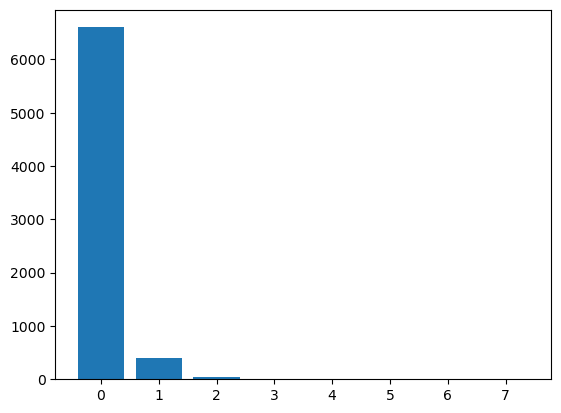

In [86]:
plt.bar(x=range(len(sigma)), height=sigma)

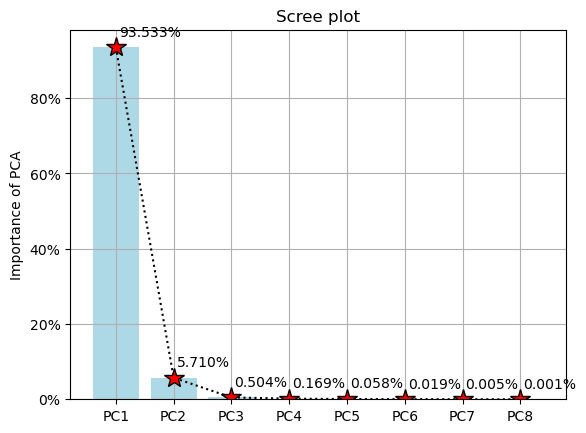

In [131]:
y = sigma / sigma.sum()
x = range(8)
plt.bar(x = range(8), height = sigma / sigma.sum(), color="lightblue")
plt.plot(range(8), sigma / sigma.sum(), marker="*", markersize = 15, color="black", markerfacecolor="red", linestyle=":")
plt.yticks([0,.2,.4,.6,.8], ["0%", "20%", "40%", "60%", "80%"])
plt.ylabel("Importance of PCA")
plt.xticks(range(8), ["PC"+str(i) for i in range(1, 9)])
plt.title("Scree plot")
plt.grid()
for i, value in enumerate(sigma / sigma.sum()):
    plt.annotate(f"{value:.3%}", (x[i], y[i]),  ha="left", xytext= (x[i]+ 0.05, y[i]+0.03))
plt.show()

## Codio Activity 6.4: Adjusting Parameters for Variance

This activity focuses on using the $\Sigma$ matrix to limit the principal components based on how much variance should be kept.  In the last activity, a screen plot was used to see when the difference in variance explained slows. 

Here, you will determine how many components are required to explain a proportion of variance.  The dataset is a larger example of a housing dataset related to individual houses and features in Ames Iowa.  For our purposes the non-null numeric data is selected.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [64]:

from sklearn.datasets import fetch_openml

In [65]:
#fetching the data
open_housing = fetch_openml(name="house_prices", as_frame=True, data_home='data')

In [66]:
open_housing.frame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [68]:
#select numeric data and drop missing values
df_open = open_housing.frame.select_dtypes(['float', 'int']).dropna(axis = 1)
#.select_dtypes(['int', 'float'])

In [69]:
df_open.shape

(1460, 35)

## Problem 1

### Scale the data

Scale the `df` data using its mean and standard deviation so that it is ready for SVD.  Assign the scaled data to `df_scaled` below.  

In [70]:
df_scaled_open = (df_open - df_open.mean())/df_open.std()

In [71]:
df_scaled_open.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730272,0.073350,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.575228,-0.288554,-0.944267,...,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730,0.347154
1,-1.727900,-0.872264,-0.091855,-0.071812,2.178881,0.156680,-0.429430,1.171591,-0.288554,-0.641008,...,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228,0.007286
2,-1.725528,0.073350,0.073455,0.651256,-0.517023,0.984415,0.829930,0.092875,-0.288554,-0.301540,...,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730,0.535970
3,-1.723156,0.309753,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.499103,-0.288554,-0.061648,...,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186,-0.515105
4,-1.720785,0.073350,0.375020,1.374324,-0.517023,0.951306,0.733056,0.463410,-0.288554,-0.174805,...,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730,0.869545


## Problem 2

### Extracting $\Sigma$

Using the scaled data, extract the singular values from the data using the `scipy.linalg` function `svd`.  Assign your results to `U`, `sigma`, and `VT` below. 

In [72]:
U,sigma,VT = svd(df_scaled_open)
print(U,sigma,VT)

[[-1.24308723e-02 -8.49597033e-03 -1.24977189e-02 ...  4.40574439e-02
   3.36826607e-02  3.87628901e-02]
 [-5.35971129e-04  1.82715003e-02  1.70668788e-02 ...  1.48131247e-02
  -1.85195102e-02 -2.33556957e-02]
 [-1.53082723e-02 -5.84118149e-03 -1.44934224e-02 ...  4.88296851e-03
   1.13925356e-02  1.41736893e-02]
 ...
 [-1.41681935e-02 -4.26182668e-02  2.83441547e-02 ...  9.58033512e-01
  -1.43835572e-03  6.59938315e-03]
 [ 2.51563070e-02  3.25371796e-02  3.66568846e-02 ... -1.04497637e-03
   9.60465319e-01 -1.64946224e-02]
 [ 7.73849326e-03  2.44572609e-02  3.41745938e-02 ...  6.03878627e-03
  -1.53828546e-02  9.68027011e-01]] [1.02276226e+02 6.79507307e+01 5.59929230e+01 5.37214715e+01
 4.64515403e+01 4.16348739e+01 4.10246248e+01 4.02572608e+01
 3.96356232e+01 3.94426877e+01 3.89853671e+01 3.82111679e+01
 3.80907565e+01 3.76108201e+01 3.70474408e+01 3.59398871e+01
 3.54620900e+01 3.43417001e+01 3.41869428e+01 3.34888389e+01
 3.22079259e+01 3.00653729e+01 2.92738204e+01 2.62366212e+0

## Problem 3

### Percent Variance Explained

Divide `sigma` by the sum of the singular values to compute the percent variance explained. Assign your result as a percents array to `percent_variance_explained` below.  

Note that due to rounding this percent won't sum to exactly 1.  

In [74]:
percent_variance_explained = sigma/sigma.sum()
print(percent_variance_explained.sum())
percent_variance_explained

0.9999999999999999


array([8.75769203e-02, 5.81847410e-02, 4.79455289e-02, 4.60005341e-02,
       3.97754492e-02, 3.56510420e-02, 3.51284989e-02, 3.44714217e-02,
       3.39391269e-02, 3.37739204e-02, 3.33823266e-02, 3.27193966e-02,
       3.26162909e-02, 3.22053318e-02, 3.17229223e-02, 3.07745480e-02,
       3.03654206e-02, 2.94060550e-02, 2.92735397e-02, 2.86757685e-02,
       2.75789503e-02, 2.57443285e-02, 2.50665392e-02, 2.24658513e-02,
       2.09267801e-02, 1.83524871e-02, 1.76221696e-02, 1.67402510e-02,
       1.44320573e-02, 1.30836615e-02, 1.23844825e-02, 1.17587153e-02,
       1.02549429e-02, 3.88919653e-17, 6.49896533e-18])

## Problem 4

### Cumulative Variance Explained

Using the solution to problem 3, how many principal components are necessary to retain up to 80% of the explained variance if we consider them in descending order?  Assign your response to `ans4` below as an integer. 

**HINT**: explore the `np.cumsum` function.

In [75]:
ans44 = int((np.cumsum(percent_variance_explained) < .8).sum())
ans44

21

In [76]:
np.cumsum(percent_variance_explained)

array([0.08757692, 0.14576166, 0.19370719, 0.23970772, 0.27948317,
       0.31513422, 0.35026271, 0.38473414, 0.41867326, 0.45244718,
       0.48582951, 0.51854891, 0.5511652 , 0.58337053, 0.61509345,
       0.645868  , 0.67623342, 0.70563948, 0.73491301, 0.76358878,
       0.79116773, 0.81691206, 0.8419786 , 0.86444445, 0.88537123,
       0.90372372, 0.92134589, 0.93808614, 0.9525182 , 0.96560186,
       0.97798634, 0.98974506, 1.        , 1.        , 1.        ])

In [77]:
np.cumsum(percent_variance_explained)<0.8

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [79]:
percent_variance_explained.shape

(35,)